# 3.1 Data Structures and Sequences

## Tuple
fixed-length, immutable sequence

In [1]:
tuple([1,2,3])

(1, 2, 3)

In [5]:
a = tuple('string')
a

('s', 't', 'r', 'i', 'n', 'g')

In [6]:
a[0]

's'

In [ ]:
nested_tup = 1, 2, (3, 4, 5), 6 # 创建 tuple 可以省略()
nested_tup

(1, 2, (3, 4, 5), 6)

In [8]:
nested_tup[2]

(3, 4, 5)

tuple中的对象可以修改的条件：

✅ 对象本身是可变类型（list, dict, set等）
✅ 通过对象的方法修改其内容
❌ 不能替换tuple中的引用
❌ 不能修改tuple的结构

记忆要点：tuple保护的是引用的不变性，而不是对象内容的不变性。

❌ 不能改变引用本身

<tup[0] = [4, 5, 6]  # TypeError: 'tuple' object does not support item assignment>

这试图让 tup[0] 指向一个新的列表对象
但tuple不允许改变其存储的引用

In [ ]:
tup = ([1, 2, 3], 'hello')
# tuple对象: tup = ([1, 2, 3], 'hello')
#                       ↓        ↓        
#            内存布局:  [引用1]  [引用2]
#                       ↓        ↓
#            实际对象:  list对象  str对象
#                      [1,2,3]   'hello'
#                      (可变)    (不可变)

tup[0].append(4)
tup[0]
# 步骤解析：
# 1. tup[0] 获取第一个引用，指向list对象
# 2. .append(4) 在该list对象上调用方法
# 3. list对象内容改变，但引用不变
# 4. tuple仍然指向同一个list对象

[1, 2, 3, 4]

In [11]:
tup = ('foo', [1, 2], True)
tup[2] = False

TypeError: 'tuple' object does not support item assignment

In [13]:
tup[1].append(4)
tup

('foo', [1, 2, 4, 4], True)

In [14]:
(4, None, 'foo') + (5, 6) + ('bar',)

(4, None, 'foo', 5, 6, 'bar')

In [15]:
('dom', 'emma')*2

('dom', 'emma', 'dom', 'emma')

Unpacking tuples

In [17]:
tup = 1,2,3,4
a,b,c,d = tup
b

2

In [18]:
tup = 4, 5, (6, 7)
a, b, (c, d) = tup
d

7

Unpacking tuple 变量解包的一个常见用途是迭代元组或列表序列：

In [20]:
seq = [(1,2,3), (4,5,6), (7,8,9)]
for a,b,c in seq:
    print(f"a={a},b={b},c={c}")

a=1,b=2,c=3
a=4,b=5,c=6
a=7,b=8,c=9


In [ ]:
values = 1,2,3,4,5,6
a,b,c,*_ = values  # *_表示忽略, *后可以跟任何变量名，*rest，*dom 等等
print(_) # * 后的值会保存在变量中

[4, 5, 6]


tuple methods

In [ ]:
a = (1,2,2,2,3,2,4)
a.count(2) # how many 2 in a 

4

## List
variable length and their contents can be modified in place

In [31]:
a_list = [2, 3, 7, None]
a_list

[2, 3, 7, None]

In [32]:
tup = ("foo", "bar", "baz")
b_list = list(tup)
b_list[1]

'bar'

In [33]:
gen = range(10)
gen

range(0, 10)

In [34]:
list(gen)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

### Adding and removing elements

In [ ]:
b_list.append('shift') # 加到 list 末尾
b_list

['foo', 'bar', 'baz', 'shift']

In [ ]:
b_list.insert(1,"emma") # 插入到指定位置
b_list

['foo', 'emma', 'bar', 'baz', 'shift']

In [ ]:
b_list.pop(2) 
# 删除第三个元素,并返回该元素。
# remove()方法删除指定元素，pop()方法删除指定索引位置的元素。
# 且 pop()方法返回被删除的元素，remove()方法返回None。

'bar'

In [38]:
b_list

['foo', 'emma', 'baz', 'shift']

In [39]:
b_list.remove('emma')
b_list

['foo', 'baz', 'shift']

In [ ]:
'foo' in b_list # chexk if 'foo' exists in list

True

In [41]:
'shit' not in b_list

True

### Concatenating and combining lists 链接列表

In [42]:
[4, None, "foo"] + [7, 8, (2, 3)]

[4, None, 'foo', 7, 8, (2, 3)]

In [43]:
x = [4, None, "foo"]
x.extend(1,2,(3,4))
print(x)

TypeError: list.extend() takes exactly one argument (3 given)

In [44]:
x = [4, None, "foo"]
x.extend([1,2,(3,4)])
x

[4, None, 'foo', 1, 2, (3, 4)]

请注意，通过加法串联列表是一个相对昂贵的作，因为必须创建一个新列表并复制对象。使用 extend 将元素附加到现有列表，尤其是在构建大型列表时，通常更可取。

In [ ]:
everything = []
for chunk in list_of_lists:
    everything.extend(chunk)

比串联替代方法更快：

In [ ]:
everything = []
for chunk in list_of_lists:
    everything = everything + chunk

### Sorting

In [46]:
a = [7, 2, 5, 1, 3]
a.sort()
a

[1, 2, 3, 5, 7]

In [47]:
b = ["saw", "small", "He", "foxes", "six"]
b.sort(key=len)
b

['He', 'saw', 'six', 'small', 'foxes']

### Slicing

python 的 [start:stop] 语法都一样，包含起始索引，但不包含结束索引。

In [48]:
seq = [7, 2, 3, 7, 5, 6, 0, 1]
seq[1:5]

[2, 3, 7, 5]

In [ ]:
seq[2:4] = [10, 20] # 替换索引为2和3的元素
seq

[7, 2, 10, 20, 5, 6, 0, 1]

In [50]:
seq[:5]

[7, 2, 10, 20, 5]

In [51]:
seq[3:]

[20, 5, 6, 0, 1]

In [52]:
seq[-4:]

[5, 6, 0, 1]

In [53]:
seq[-6:-2]

[10, 20, 5, 6]

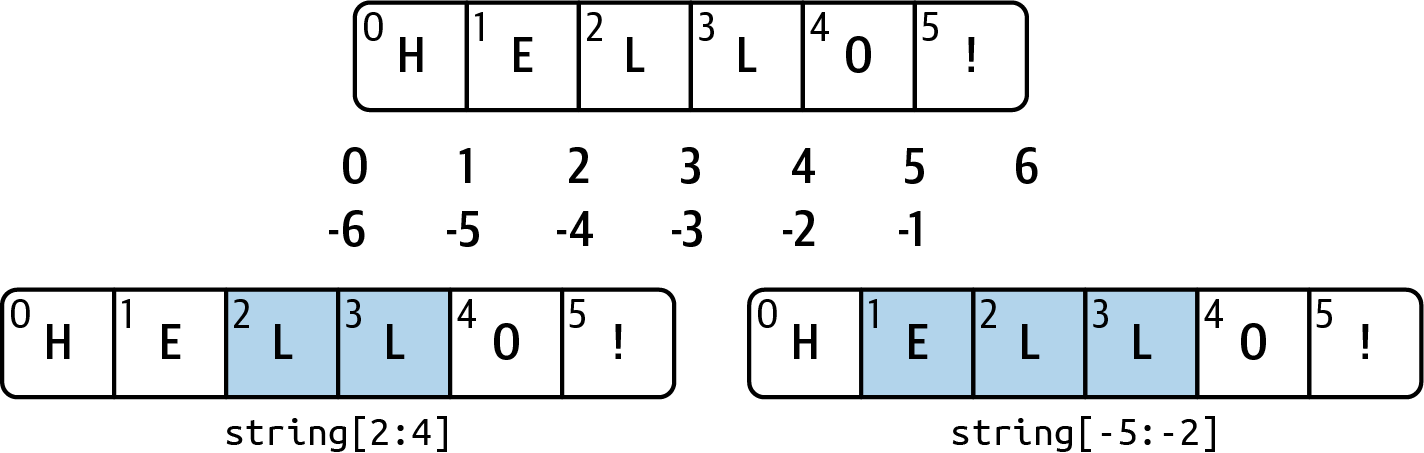

也可以在第二个冒号之后使用一个 step 来获取元素：

In [54]:
seq1 = [1,2,3,4,5,6,7,8,9,10]
seq1[::2]

[1, 3, 5, 7, 9]

In [55]:
seq1[::-1]

[10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

## Dictionary
dictionary stores a collection of key-value pairs

In [79]:
empty_dict = {}
d1 = {"a": "dom", "b": [1,3,1,4], "c": 'emma'}
d1

{'a': 'dom', 'b': [1, 3, 1, 4], 'c': 'emma'}

In [80]:
# 在末尾插入键值对
d1['d'] = 'forever'
d1

{'a': 'dom', 'b': [1, 3, 1, 4], 'c': 'emma', 'd': 'forever'}

In [ ]:
del d1['d'] # 删除字典中的键d
d1

{'a': 'dom', 'b': [1, 3, 1, 4], 'c': 'emma'}

In [82]:
ret = d1.pop('b')
ret

[1, 3, 1, 4]

In [83]:
d1

{'a': 'dom', 'c': 'emma'}

In [84]:
list(d1.keys())

['a', 'c']

In [85]:
list(d1.items())

[('a', 'dom'), ('c', 'emma')]

In [87]:
d1.update({'d': [1,3,1,4], 'e': 'forever'})
d1

{'a': 'dom', 'c': 'emma', 'd': [1, 3, 1, 4], 'e': 'forever'}

### Creating dictionaries from sequences

快速创建字典

In [88]:
tuples = zip(range(5),reversed(range(5)))

tuples

In [89]:
mapping = dict(tuples)
mapping

{0: 4, 1: 3, 2: 2, 3: 1, 4: 0}

快速返回默认值

In [96]:
some_dict = {
    'a': 1,
    'b': 2,
    'c': 3,
    'd': 4,
    'e': 5
}
zzz = some_dict.get('a', 'there is no a key in dict')
zzz

1

In [97]:
xxx = some_dict.get('key', 'default')
xxx

'default'

In [ ]:
some_dict # .get() 不会返回默认值，但不修改 dict

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5}

In [ ]:
words = ["apple", "bat", "bar", "atom", "book"]

by_letter = {}

for word in words:
    letter = word[0]
    if letter not in by_letter:
        by_letter[letter] = [word] # 创建一个列表
    else:
        by_letter[letter].append(word)

by_letter

{'a': ['apple', 'atom'], 'b': ['bat', 'bar', 'book']}

In [92]:
by_letter = {}

for word in words:
    letter = word[0]
    by_letter.setdefault(letter, []).append(word)

by_letter

{'a': ['apple', 'atom'], 'b': ['bat', 'bar', 'book']}

In [100]:
from collections import defaultdict

words2 = ['apple', 'banana', 'cherry', 'date', 'elderberry', 'fig', 'grape', 'honeydew', 'kiwi', 'lemon']

by_letter = defaultdict(list)

for word in words2:
    by_letter[word[0]].append(word)

by_letter

defaultdict(list,
            {'a': ['apple'],
             'b': ['banana'],
             'c': ['cherry'],
             'd': ['date'],
             'e': ['elderberry'],
             'f': ['fig'],
             'g': ['grape'],
             'h': ['honeydew'],
             'k': ['kiwi'],
             'l': ['lemon']})

### Valid dictionary key types
虽然字典的值可以是任何 Python 对象，但键通常必须是不可变对象，例如标量类型（int、float、string）或元组（元组中的所有对象也需要是不可变的）。这里的技术术语是hashability 。您可以使用哈希函数检查对象是否可哈希（可用作字典中的键）：

In [102]:
hash('dom')

4703696380698050637

In [ ]:
hash((1,2,[3,4])) # fails because lists are mutable

TypeError: unhashable type: 'list'

In [106]:
hash((1,2,(3,4)))

3794340727080330424

## Set
集合是唯一元素的无序集合

In [109]:
set([1,1,2,2,3,3])

{1, 2, 3}

In [ ]:
set((1,2,2,2)) 
# 使用 tuple 或者list作为 set 函数的参数，是因为 set 函数只接受一个参数

{1, 2}

集合支持数学集合运算 ，如并集、交集、差分和对称差分

In [111]:
 a = {1,2,3,4,5,6,7,8,9,10}
 b = {6,7,8,9,10,11,12,13,14,15}
 
 a.union(b)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}

In [112]:
a.intersection(b)

{6, 7, 8, 9, 10}

In [113]:
a_set = {1, 2, 3, 4, 5}
{1,2,3}.issubset(a_set)

True

In [115]:
a_set.issuperset({1, 2, 3})

True

In [116]:
{1,2,3} == {3,2,1}

True

## Built-In Sequence Functions

### enumerate
enumerate() 为可迭代对象的每个元素自动添加索引，让你同时获得：

索引位置 (index)
元素值 (value)

In [1]:
# enumerate(iterable, start=0)

fruits = ['apple', 'banana', 'orange']
for index, value in enumerate(fruits):
    print(f"索引=>{index}: {value}")

索引=>0: apple
索引=>1: banana
索引=>2: orange


### sorted 排序

In [2]:
sorted((1,3,2,8,100,56))


[1, 2, 3, 8, 56, 100]

In [3]:
sorted([1,3,2,9,99,56,45], reverse=True)

[99, 56, 45, 9, 3, 2, 1]

In [4]:
sorted("mihoyo zenless zero zone")

[' ',
 ' ',
 ' ',
 'e',
 'e',
 'e',
 'e',
 'h',
 'i',
 'l',
 'm',
 'n',
 'n',
 'o',
 'o',
 'o',
 'o',
 'r',
 's',
 's',
 'y',
 'z',
 'z',
 'z']

### zip
将多个 list, tuple, string, dict 配对在一个 tuple 中

In [ ]:
seq1 = ('domi', 'emma', 'alice') # 可以是 tuple
seq2 = ['genshin', 'love and deepsky', 'zzz'] # 也可以是 list
list(zip(seq1, seq2))

[('domi', 'genshin'), ('emma', 'love and deepsky'), ('alice', 'zzz')]

In [ ]:
seq3 = {'mihoyo': 2020, 'netease': 2022} 
# 当zip函数处理字典时，默认只迭代字典的键(keys)，这是字典的默认迭代行为。
list(zip(seq1, seq2, seq3))

[('domi', 'genshin', 'mihoyo'), ('emma', 'love and deepsky', 'netease')]

配对字典的键值对

In [ ]:
配对键: zip(list, dict) 或 zip(list, dict.keys())
配对值: zip(list, dict.values())
配对键值对: zip(list, dict.items())

In [9]:
info = list(zip(seq2, seq3.items()))
info

[('genshin', ('mihoyo', 2020)), ('love and deepsky', ('netease', 2022))]

In [10]:
dict(zip(seq1, info))

{'domi': ('genshin', ('mihoyo', 2020)),
 'emma': ('love and deepsky', ('netease', 2022))}

zip + enumerate

In [12]:
for index, (a,(b,c)) in enumerate(info):
    print(f'{index+1}: {a} is from {b} at {c}')


1: genshin is from mihoyo at 2020
2: love and deepsky is from netease at 2022


### reversed
与 sorted() 类似，reversed() 函数返回一个迭代器对象，该对象返回序列中的元素，但是顺序是相反的。

In [13]:
list(reversed(range(10)))

[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

## List, Set, and Dict Comprehensions
通过过滤集合的元素，将传递过滤器的元素转换为一个简洁的表达式来简洁地形成新列表。

In [ ]:
[expr（要干嘛） for value in collection if condition（过滤器）]

等效于：

result = []
for value in collection:
    if condition:
        result.append(expr)

In [ ]:
# list comprehension
strings = ["a", "as", "bat", "car", "dove", "python"]

[word.upper() for word in strings if len(word) > 2]

['BAT', 'CAR', 'DOVE', 'PYTHON']

In [17]:
# set comprehension
unique_len = {len(w) for w in strings}
unique_len

{1, 2, 3, 4, 6}

In [20]:
# dict compression
index_words = {i+1: word for i, word in enumerate(strings)}
index_words

{1: 'a', 2: 'as', 3: 'bat', 4: 'car', 5: 'dove', 6: 'python'}

Nested list comprehensions

In [ ]:
all_data = [["John", "Emily", "Michael", "Mary", "Steven"], 
            ["Maria", "Juan", "Javier", "Natalia", "Pilar"]]
[classmate for groups in all_data 
            for classmate in groups 
            if classmate.count("a") >= 2]

['Maria', 'Natalia']

In [31]:
some_tuples = [(1, 2, 3), (4, 5, 6), (7, 8, 9)]
filter_5 = [num for t in some_tuples for num in t if num > 5]
filter_5

[6, 7, 8, 9]

您可以有任意多个级别的嵌套，但如果您有两个或三个以上的嵌套级别，您可能应该开始质疑从代码可读性的角度来看这是否有意义。

接下来生成列表列表，而不是所有内部元素的列表。

In [ ]:
[[num for num in t] 
 for t in some_tuples]

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]

# 3.2 Functions

In [111]:
def function1(x,y):
    return x+y
function1(1,2)

3

In [112]:
def function_with_noreturn(x):
    print(x)

result = function_with_noreturn('hi man') # hi man

print(result) # None (no return)

hi man
None


每个函数都可以有位置参数和关键字参数。关键字参数最常用于指定默认值或可选参数。

In [113]:
def function2(x, y, z = 3):
    if z >= 2:
        return z * (x + y)
    else:
        return z * (x - y)

print(function2(1, 2))
print(function2(1, 2, 1.5))

9
-1.5


In [114]:
def mixed_params(a, b, c, d=10, e=20):
    return f"a={a}, b={b}, c={c}, d={d}, e={e}"

# ✅ 正确：位置参数在前，关键字参数在后
result1 = mixed_params(1, 2, 3, d=40, e=50)
print(result1)
result2 = mixed_params(1, 2, 3, e=50, d=40)
print(result2)# 关键字参数顺序可以颠倒

# ❌ 错误：关键字参数后不能再有位置参数
# result3 = mixed_params(1, 2, d=40, 3)  # SyntaxError

a=1, b=2, c=3, d=40, e=50
a=1, b=2, c=3, d=40, e=50


## Namespaces, Scope, and Local Functions
函数可以访问函数内部创建的变量以及函数外部在更高（甚至全局 ）范围内创建的变量

In [115]:
def func():
    bb = []
    for i in range(5):
        bb.append(i)
func()
bb # bb is destroyed when the function exits.

NameError: name 'bb' is not defined

In [ ]:
aa = [] # 在函数外定义一个空列表
def func():
    for i in range(5):
        aa.append(i)

func()
aa

[0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4]

In [ ]:
cc = None
def func3():
    global cc # 使用 global 在函数作用域之外赋值变量
    cc = [1,2]
func3()
cc


[1, 2]

## Returning Multiple Values

In [ ]:
def f():
    a = 1
    b = 2
    c = 3
    return a, b, c
# e, f, g = f()
# print(e, f, g)
# print(f)

In [ ]:
value22 = f()
value22 # 一个3-tuple值

(1, 2, 3)

In [ ]:
def f1():
    a = 1
    b = 2
    c = 3
    return {'a': a, 'b': b, 'c': c}
return_value = f1()
return_value


{'a': 1, 'b': 2, 'c': 3}

## Functions Are Objects

任何曾经使用过用户提交的调查数据的人都见过这样混乱的结果。要使此字符串列表统一并准备好进行分析，需要做很多事情：去除空格、删除标点符号以及标准化正确的大小写。一种方法是使用内置字符串方法以及正则表达式的 re standard 库模块：

In [ ]:
import re

states = ["   Alabama ", "Georgia!", "Georgia", "georgia", "FlOrIda",
          "south   carolina##", "West virginia?"]

def clean_strings(strings):
    result = []
    for s in strings:
        cleaned = re.sub('[!#$%?]', '', s) # 删除[]中特殊字符
        cleaned = cleaned.strip() # 去除字符串前后空格
        cleaned = cleaned.title()
        result.append(cleaned)
    return result

clean_strings(states)

['Alabama',
 'Georgia',
 'Georgia',
 'Georgia',
 'Florida',
 'South   Carolina',
 'West Virginia']

函数模块化改写

In [ ]:
def remove_punctuation(text):
    """
    Remove punctuation from a string.
    """
    return re.sub('[!#$%?]', '', text)

clean_prompt = [remove_punctuation, str.strip, str.title]

def clean_strings2(strings, prompts):
    result = []
    for string in strings:
        for prompt in prompts:
            string = prompt(string)
        result.append(string)
    return result

clean_strings2(states, clean_prompt)

['Alabama',
 'Georgia',
 'Georgia',
 'Georgia',
 'Florida',
 'South   Carolina',
 'West Virginia']

未绑定方法的使用

In [ ]:
# 基本语法：类名.方法名(实例, 其他参数...)
ClassName.method_name(instance, arg1, arg2, ...)

# 绑定方法：实例.方法(参数1, 参数2, ...)
instance.method(arg1, arg2, arg3)

# 未绑定方法：类.方法(实例, 参数1, 参数2, ...)
ClassName.method(instance, arg1, arg2, arg3)
#                   ↑
#           实例作为第一个参数


In [ ]:
# str.strip 是一个未绑定的方法
# 它需要一个字符串实例作为第一个参数

# 这两种调用方式是等价的：
text = "  hello world  "

# 方式1: 实例方法调用
result1 = text.strip()

# 方式2: 类方法调用 (传递实例作为第一个参数)
result2 = str.strip(text)

print(f"方式1结果: '{result1}'")  # 'hello world'
print(f"方式2结果: '{result2}'")  # 'hello world'
print(f"结果相等: {result1 == result2}")  # True

方式1结果: 'hello world'
方式2结果: 'hello world'
结果相等: True


map()函数

In [ ]:
# 基本模式
map(function, iterable)

# 多参数模式  
map(function, iterable1, iterable2, ...)

# 常用转换
list(map(function, iterable))  # 转换为列表
tuple(map(function, iterable)) # 转换为元组

### **参数详解**

- **function**: 要应用的函数（可以是普通函数、lambda函数、方法引用等）
- **iterable**: 一个或多个可迭代对象（列表、元组、字符串等）

### **返回值**

返回一个 **map对象**（迭代器），需要转换为列表或其他形式才能查看结果

In [ ]:
for x in map(remove_punctuation, states):
    print(x)

list(map(str.strip, states)) # 使用未绑定的方法

   Alabama 
Georgia
Georgia
georgia
FlOrIda
south   carolina
West virginia


['Alabama',
 'Georgia!',
 'Georgia',
 'georgia',
 'FlOrIda',
 'south   carolina##',
 'West virginia?']

In [131]:
def square(x):
    return x*x
numbers = [1,2,3,4,5]
squares = map(square, numbers)
print(squares) # 返回一个 map 对象（迭代器）
print(list(squares))

[1, 4, 9, 16, 25]


In [134]:
test = [num for num in squares]
print(test)

[]


## Lambda Functions 匿名函数，快速创建单语句函数
Python 支持所谓的匿名或 lambda 函数，这是一种编写由单个语句组成的函数的方法，其结果是返回值。

In [139]:
def short_function(x):  
    return x * 2

# 等效于：
equiv_anon = lambda x: x * 2 # 单个语句函数

In [ ]:
def apply_to_list(some_list, f):  
    return [f(x) for x in some_list]

ints = [4, 0, 1, 5, 6]

apply_to_list(ints, equiv_anon) # 使用上面定义的 lambda 函数

[8, 0, 2, 10, 12]

## Generators

In [2]:
some_dict = {"a": 1, "b": 2, "c": 3}
dict_iterator = iter(some_dict)
dict_iterator

In [3]:
list(dict_iterator)

['a', 'b', 'c']

普通函数一次执行并返回一个结果，而生成器可以通过在每次使用生成器时暂停和恢复执行来返回多个值的序列。要创建生成器，请在函数中使用 yield 关键字而不是 return：

In [7]:
def squares(n=10):
    print(f'Generating squares from 1 to {n ** 2}')
    for number in range(1, n + 1):
        yield number ** 2 # generator 使用yield

gen = squares()
gen

<generator object squares at 0x115919af0>

In [11]:
next(gen) # 每次执行迭代器，返回下一个值

16

yield 🆚 return

In [15]:
def squares(n=10):
    print(f'Generating squares from 1 to {n ** 2}')
    for number in range(1, n + 1):
        yield number ** 2  # 生成器使用yield

# 使用yield版本
print("=== 使用yield的版本 ===")
gen = squares(5)
print(f"函数调用结果: {gen}")  # <generator object squares at 0x...>
print(f"类型: {type(gen)}")    # <class 'generator'>

print("逐个获取值:")
for i, value in enumerate(gen):
    print(f"第{i+1}个值: {value}")

=== 使用yield的版本 ===
函数调用结果: <generator object squares at 0x1161d3370>
类型: <class 'generator'>
逐个获取值:
Generating squares from 1 to 25
第1个值: 1
第2个值: 4
第3个值: 9
第4个值: 16
第5个值: 25


In [18]:
def squares_return(n=10):
    print(f'Generating squares from 1 to {n ** 2}')
    result = []
    for number in range(1, n + 1):
        result.append(number ** 2)
    return result  # 一次性返回整个列表

# 使用return版本
print("\n=== 使用return的版本 ===")
result = squares_return(5)
print(f"函数调用结果: {result}")  # [1, 4, 9, 16, 25]
print(f"类型: {type(result)}")    # <class 'list'>

print("遍历值:")
for i, value in enumerate(result):
    print(f"第{i+1}个值: {value}")


=== 使用return的版本 ===
Generating squares from 1 to 25
函数调用结果: [1, 4, 9, 16, 25]
类型: <class 'list'>
遍历值:
第1个值: 1
第2个值: 4
第3个值: 9
第4个值: 16
第5个值: 25


内存大小对比

In [ ]:
import sys

def large_squares_yield(n):
    """使用yield的大数据生成器"""
    for number in range(1, n + 1):
        yield number ** 2

def large_squares_return(n):
    """使用return的大数据函数"""
    return [number ** 2 for number in range(1, n + 1)]

# 内存使用对比
n = 100000
print("=== 内存使用对比 ===")


# yield版本
gen = large_squares_yield(n)
print(f"生成器对象大小: {sys.getsizeof(gen)} 字节")

# return版本
result_list = large_squares_return(n)
print(f"列表对象大小: {sys.getsizeof(result_list)} 字节")
print(f"内存差异: {sys.getsizeof(result_list) // sys.getsizeof(gen)} 倍")

# 因为yield版本生成器对象一次只返回一个值，所以内存占用更小。
# 但是return版本生成器对象一次返回了所有值，所以内存占用更大。 内存会存储所有值。

=== 内存使用对比 ===
生成器对象大小: 104 字节
列表对象大小: 800984 字节
内存差异: 7701 倍


运行时机对比

In [ ]:
import time

def slow_squares_yield(n):
    """慢速yield版本"""
    print(f"🚀 开始生成 {n} 个平方数")
    for number in range(1, n + 1):
        print(f"  计算中... {number}")
        time.sleep(0.1)  # 模拟耗时操作
        yield number ** 2

def slow_squares_return(n):
    """慢速return版本"""
    print(f"🚀 开始生成 {n} 个平方数")
    result = []
    for number in range(1, n + 1):
        print(f"  计算中... {number}")
        time.sleep(0.1)  # 模拟耗时操作
        result.append(number ** 2)
    return result

print("=== 执行时机对比 ===")
print("创建yield生成器:")
start_time = time.time()
gen = slow_squares_yield(3)
print(f"创建时间: {time.time() - start_time:.2f}秒")
print("注意：还没有执行任何计算！")

print("\n获取第一个值:")
start_time = time.time()
first_value = next(gen)
print(f"第一个值: {first_value}, 耗时: {time.time() - start_time:.2f}秒")

print("\n获取第二个值:")
start_time = time.time()
second_value = next(gen)
print(f"第二个值: {second_value}, 耗时: {time.time() - start_time:.2f}秒")

print("创建 return_value 函数:")
start_time = time.time()
return_value = slow_squares_return(3)
print(f"返回值: {return_value}, 耗时: {time.time() - start_time:.2f}秒") 



=== 执行时机对比 ===
创建yield生成器:
创建时间: 0.00秒
注意：还没有执行任何计算！

获取第一个值:
🚀 开始生成 3 个平方数
  计算中... 1
第一个值: 1, 耗时: 0.10秒

获取第二个值:
  计算中... 2
第二个值: 4, 耗时: 0.10秒
创建 return_value 函数:
🚀 开始生成 3 个平方数
  计算中... 1
  计算中... 2
  计算中... 3
返回值: [1, 4, 9], 耗时: 0.32秒


函数内部参数状态可恢复

In [ ]:
def counter_yield():
    """yield版本：保持状态"""
    count = 0 # 内部计数器可以持久保存状态
    while True:
        count += 1
        print(f"  内部计数: {count}")
        yield count

def counter_return():
    """return版本：无法保持状态"""
    count = 0
    count += 1
    print(f"  内部计数: {count}")
    return count

print("=== 状态保持对比 ===")
print("yield版本（保持状态）:")
gen = counter_yield()
print(f"第1次调用: {next(gen)}")
print(f"第2次调用: {next(gen)}")
print(f"第3次调用: {next(gen)}")

print("\nreturn版本（不保持状态）:")
print(f"第1次调用: {counter_return()}")
print(f"第2次调用: {counter_return()}")
print(f"第3次调用: {counter_return()}")

=== 状态保持对比 ===
yield版本（保持状态）:
  内部计数: 1
第1次调用: 1
  内部计数: 2
第2次调用: 2
  内部计数: 3
第3次调用: 3

return版本（不保持状态）:
  内部计数: 1
第1次调用: 1
  内部计数: 1
第2次调用: 1
  内部计数: 1
第3次调用: 1


性能过程对比

In [ ]:
# 只需要前几个值的情况
def performance_test():
    # yield版本：只计算需要的值
    def yield_version(n):
        for i in range(n):
            print(f"yield计算: {i}")
            yield i ** 2

    # return版本：计算所有值
    def return_version(n):
        result = []
        for i in range(n):
            print(f"return计算: {i}")
            result.append(i ** 2)
        return result

    print("只需要前3个值的情况:")
    print("yield版本:")
    gen = yield_version(1000)
    first_three = [next(gen) for _ in range(3)]
    print(f"获得: {first_three}")

    # return版本会计算所有1000个值（这里用小数据演示）
    print("\\nreturn版本:")
    result = return_version(5)  # 小数据仅作演示，因为 return 会计算所有值
    first_three = result[:3]
    print(f"获得: {first_three}")

performance_test()

只需要前3个值的情况:
yield版本:
yield计算: 0
yield计算: 1
yield计算: 2
获得: [0, 1, 4]
\nreturn版本:
return计算: 0
return计算: 1
return计算: 2
return计算: 3
return计算: 4
获得: [0, 1, 4]


### Generator expressions

In [22]:
gen = (x ** 2 for x in range(10))
gen

<generator object <genexpr> at 0x115c31e70>

In [27]:
print(next(gen))

9


In [30]:
sum((x ** 2 for x in range(1, 100)))

328350

In [38]:
dict(([i, i ** 2] for i in range(5)))

{0: 0, 1: 1, 2: 4, 3: 9, 4: 16}

### itertools module

In [ ]:
import itertools

def first_letter(x):
    return x[0]

names = ["Alan", "Adam", "Wes", "Will", "Albert", "Steven"]

see = itertools.groupby(names, first_letter) # names is a generator

dict(see) # itertools.groupby(iterable, key=<function>)


{'A': <itertools._grouper at 0x115d70c70>,
 'W': <itertools._grouper at 0x115da2ad0>,
 'S': <itertools._grouper at 0x115da38b0>}

In [45]:
for letter, names in itertools.groupby(names, first_letter):
    print(letter, list(names))

A ['Alan', 'Adam']
W ['Wes', 'Will']
A ['Albert']
S ['Steven']


## Errors and Exception Handling

In [46]:
float('1.2345')

1.2345

In [47]:
float('something')

ValueError: could not convert string to float: 'something'

In [ ]:
def attempt_float(value):
    result = []
    for i in value:
        try:
            a = float(i)
        except:
            a = i
        result.append(a)
    return result

value = ['1', '2.3', '4', 'lipton', '5.6']

attempt_float(value)

[1.0, 2.3, 4.0, 'lipton', 5.6]